Dream Housing Finance société de crédit spécialisée dans les prêts immobiliers. Ils sont présents dans toutes les zones urbaines, semi-urbaines et rurales. Pour chaque client demandeur de prêt au logement l'entreprise doit vérifier l'éligibilité de ce dernier.

L'entreprise souhaite automatiser le processus d'admissibilité au prêt en fonction des renseignements fournis par le client au moment de remplir le formulaire de demande en ligne. 

Ces détails sont le sexe, l'état civil, les études, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres. Pour automatiser ce processus, ils ont donné un problème pour identifier les segments de clients, ceux qui sont éligibles pour le prêt afin qu'ils puissent cibler spécifiquement ces clients. Ils ont fourni ici un ensemble partiel de données.

La variable à prédire est donc *Loan_Status*.


Ci-après le détail des données:

**The Data**  

*Variable* 	: *Description* 

Loan_ID: 	Unique Loan ID     
Gender: 	Male/ Female  
Married: 	Applicant married (Y/N)  
Dependents: 	Number of dependents  
Education: 	Applicant Education (Graduate/ Under Graduate)  
Self_Employed: 	Self employed (Y/N)  
ApplicantIncome: 	Applicant income  
CoapplicantIncome: 	Coapplicant income    
LoanAmount 	Loan: amount in thousands  
Loan_Amount_Term: 	Term of loan in months  
Credit_History: 	credit history meets guidelines  
Property_Area: 	Urban/ Semi Urban/ Rural  
Loan_Status: 	Loan approved (Y/N)  

**Challenge:**


Réalisez une analyse graphique pour explorer les données.  
Faites un premier modèle pour prédire la variable cible, vous évalurez la performance de ce modèle à l'aide d'une validation croisée à 5 couches.


In [0]:
url = "https://raw.githubusercontent.com/shri1407/Loan-Prediction-Dataset/master/train.csv"

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer,mean_squared_error

In [0]:
df_pret = pd.read_csv(url)
df_pret.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [0]:
df_pret.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [0]:
df_pret.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [0]:
df_pret['Credit_History'].unique()

array([ 1.,  0., nan])

In [0]:
df_pret[df_pret.isna()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_pret.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


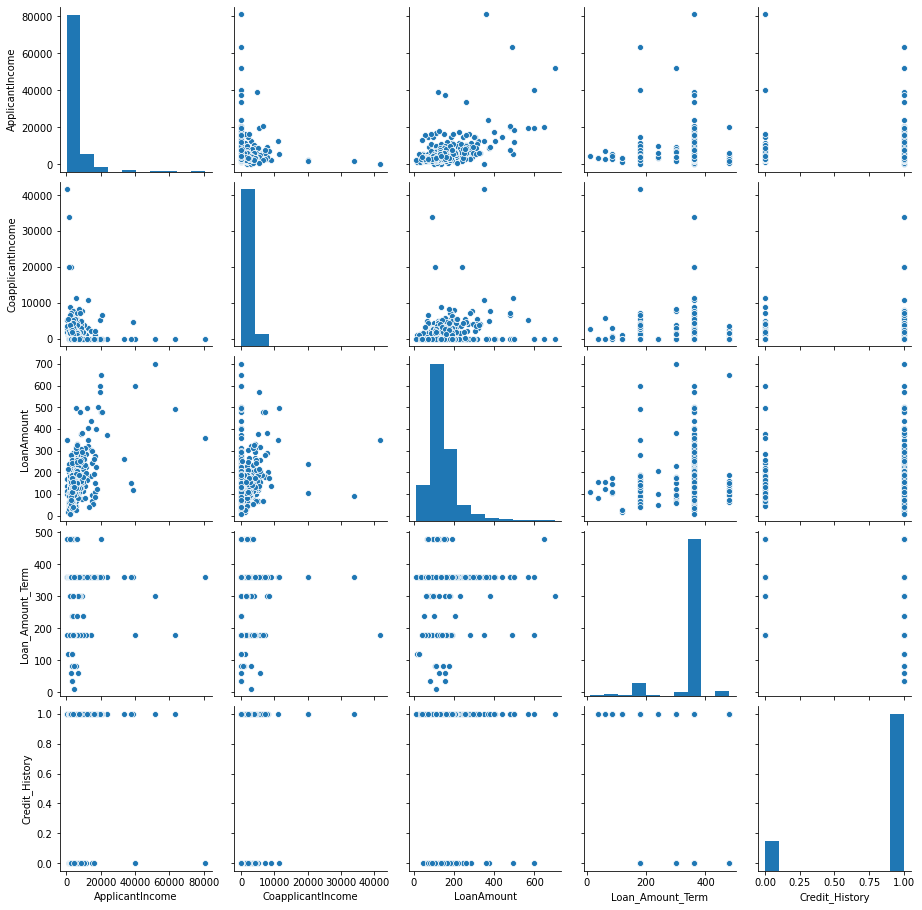

In [0]:
sns.pairplot(df_pret)

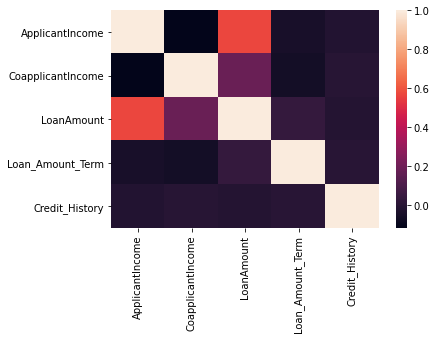

In [0]:
sns.heatmap(df_pret.corr())
plt.show()

In [0]:
df_pret.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


In [0]:
#dummification
df_pret = pd.concat([df_pret, pd.get_dummies(df_pret[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']], drop_first=True)], axis = 1)

In [0]:
df_pret.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,1,0,0,0,0,1,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,0,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,1,1


In [0]:
df_pret.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [0]:
df_pret['Credit_History'][df_pret['Credit_History'].isna()] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
df_pret['LoanAmount'].fillna(value = 0, inplace = True)

In [0]:
df_pret['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [0]:
df_pret.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Loan_Status_Y'],
      dtype='object')

In [0]:
# Reg model
# sexe, l'état civil, les études, le nombre de personnes à charge, le revenu, le montant du prêt, les antécédents de crédit et autres

X = df_pret[['CoapplicantIncome', 'LoanAmount', 'ApplicantIncome', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban']]
y = df_pret['Loan_Status_Y']

In [0]:
LogRegModel = LogisticRegression()

scores =cross_val_score(LogRegModel, X, y, cv= StratifiedKFold(n_splits=5,random_state=42,shuffle=True),scoring='accuracy')

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [0]:
scores

array([0.72357724, 0.69918699, 0.73170732, 0.72357724, 0.80327869])

In [0]:
def regression_modeling(model, data, target, screening):
    '''
    :param model: 'knn', 'lr', 'log'
    :param data: DataFrame
    :param target: y
    :param screening: Do you want a print of the scores
    :return: Return the fitted model and the columns used
    '''
    ##### SELECTION DU TYPE DE REGRESSION
    # Select le linear model
    if model.lower() == 'knn':
        from sklearn.neighbors import KNeighborsRegressor
    elif model.lower() == 'lr':
        from sklearn.linear_model import LinearRegression
    elif model.lower() == 'log':
        from sklearn.linear_model import LogisticRegression
    else:
        print('Error model type not valid')

    ##### IMPORT
    import numpy as np
    import pandas as pd

    from sklearn.metrics import make_scorer, accuracy_score
    from sklearn.model_selection import cross_val_score, StratifiedKFold

    ##### COLUMNS SELECTIONS
    # Sélection des colonnes qui ne sont pas de type 'object'
    obj = data.columns[data.dtypes.values == np.dtype("object")]
    colNames = [x for x in data.columns if x not in obj]

    # Création d'un dictionnaire avec les variables les plus corrélées à la target
    df_corr = data[colNames].corr()
    dictCorr = dict(df_corr[target])
    del dictCorr[target]

    dictCorr = sorted(dictCorr.items(), key = lambda x : x[1])
    dictCorr.reverse()

    ##### BOUCLE D'ENTRAINEMENT DU MODEL
    # Variables
    cols = []
    score_max = 0
    scores_max = 0
    Xcolumns = []

    # Début de la boucle de modélisation en partant de la plus forte corrélation
    for x, r in dictCorr:
        cols.append(x)    # Ajout d'une nouvelle variable au model
        X = data[cols]
        y = data[target]

        if model.lower() == 'knn':
            cv =  StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
            scores = cross_val_score(KNeighborsRegressor(), X, y, cv=cv,
                                        scoring = make_scorer(accuracy_score))
        elif model.lower() == 'lr':
            cv =  StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
            scores = cross_val_score(LinearRegression(), X, y, cv=cv,
                                    scoring = make_scorer(accuracy_score))
        elif model.lower() == 'log':
            cv =  StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)
            scores = cross_val_score(LogisticRegression(), X, y, cv=cv,
                                    scoring = make_scorer(accuracy_score))
        else:
            break

        if np.mean(scores) > score_max:     # Si la nouvelle variable augmente le score,
            score_max = np.mean(scores)     # on met à jour les variables
            scores_max = scores
            Xcolumns = cols
        else:
            cols.remove(x)

    ### SCREENING
    # Print du mini compte rendu
    if screening:
      if len(Xcolumns) > 1:
        print('Best scores obtained with {} variables :'.format(len(Xcolumns)))
      else:
        print('Best scores obtained with {} variable :'.format(len(Xcolumns)))

      for col in Xcolumns:
        print("   ",col)

      print('\nMean score =', score_max)
      print('Scores :', scores_max)

    # Fit un nouveau model avec les meilleures variables
    from sklearn.model_selection import train_test_split
    Xmax = data[Xcolumns]
    X_train, X_test, y_train, y_test = train_test_split(Xmax, y, random_state=42,
                                                          train_size = 0.75)
    if model.lower() == 'knn':
      modelMax = KNeighborsRegressor().fit(X_train, y_train)
    elif model.lower() == 'lr':
      modelMax = LinearRegression().fit(X_train, y_train)
    elif model.lower() == 'log':
      modelMax = LogisticRegression().fit(X_train, y_train)

    # Retourne le meilleur model.
    return modelMax, Xcolumns

In [0]:
df_pret_clean = df_pret[['CoapplicantIncome', 'LoanAmount', 'ApplicantIncome', 'Credit_History', 'Gender_Male', 'Married_Yes', 'Education_Not Graduate',
       'Self_Employed_Yes', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Loan_Status_Y']]

In [79]:
df_pret_clean.isna().sum()

CoapplicantIncome          0
LoanAmount                 0
ApplicantIncome            0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
dtype: int64

In [82]:
regression_modeling('log', df_pret, 'Loan_Status_Y', True)

Best scores obtained with 1 variable :
    Credit_History

Mean score = 0.7704118352658936
Scores : [0.77235772 0.77235772 0.73170732 0.77235772 0.80327869]


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn

(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False), ['Credit_History'])